# Let's run some experiments!

Here there are some nice plot of the results I've achieved with this **INCREDIBLY** dumb classifier.

You are wondering if I'm extracting features...?
The answer is **NOT AT ALL**. The images are quite all the same except from the caption.
So there are surely some pixels which can be considered important somehow.

I'm going to use a [RandomForest Classifier](https://en.wikipedia.org/wiki/Random_forest).

Here it goes a brief explanation on what a Random Forest is.

Each column of the dataset may be used as a split on data.
Is this feature 0 or 1? Or is this number greater than some value? This is the basis of [Decision Trees](https://en.wikipedia.org/wiki/Decision_tree_learning).

![An example of decision trees](https://cdn-images-1.medium.com/max/1600/1*xGsYc6aXehD7lyoLEn-mMA.png) 

(The image has been taken from [here](https://medium.com/machine-learning-bites/machine-learning-decision-tree-classifier-9eb67cad263e))

As you may notice, each decision leads to a classification and, more important, it's totally **non-linear**.

Problem of decision trees: they need to be regularized, somehow. Decision are made by different subsamplings of data.

It means that, if data is poorly choosed then the resulting decision tree will end with very bad predictions. The main culprit of this is the variance: how may I reduce it and take a more general solution which takes into account noise?

This leads to Random forests: add more and more decision trees and average between them.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons, load_iris, make_blobs, make_classification
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import numpy as np
import random


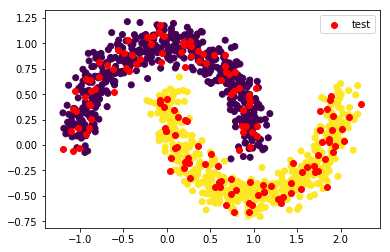

In [41]:
X_moons, y_moons = make_moons(n_samples=1000, noise = 0.1)
X_tst, y_tst = make_moons(n_samples=150, noise = 0.1)
plt.scatter(X_moons[:,0],X_moons[:,1], c=y_moons)
plt.scatter(X_tst[:,0],X_tst[:,1], c='r', label='test')
plt.legend()

In [88]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=10)
dt.fit(X_moons, y_moons)
rf.fit(X_moons, y_moons)
yp1 = dt.predict(X_tst)
yp2 = rf.predict(X_tst)
print('Iteration {}'.format(i+1))
print('Error Decision tree: ', 100*np.sum(yp1 != y_tst) / len(y_tst),' %')
print('Error Random forest with esitimators {}: '.format(rf.n_estimators), 100*np.sum(yp2 != y_tst) / len(y_tst),' %')


Iteration 10
Error Decision tree:  0.666666666667  %
Error Random forest with esitimators 10:  0.0  %


Mmmh. It seems that they are not so bad, after all. This is a very very very simple problem, only 2 dimensions.
Let's try to use much more complicated data.

In [83]:
X, y = make_classification(n_samples = 2000, n_features =100, n_informative=50)
s = StratifiedShuffleSplit(test_size=0.1)
for tr, ts in s.split(X,y):
    Xbt,ybt = X[ts], y[ts]
    Xb, yb =  X[tr], y[tr]
    break

for i in range(10):    
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier(n_estimators=10 + i*2)
    dt.fit(Xb, yb)
    rf.fit(Xb, yb)
    yp1 = dt.predict(Xbt)
    yp2 = rf.predict(Xbt)
    print('Iteration {}'.format(i+1))
    print('Error Decision tree: ', 100*np.sum(yp1 != ybt) / len(ybt),' %')
    print('Error Random forest with esitimators {}: '.format(rf.n_estimators), 100*np.sum(yp2 != ybt) / len(ybt), '%')

Iteration 1
Error Decision tree:  35.0  %
Error Random forest with esitimators 10:  27.5 %
Iteration 2
Error Decision tree:  35.0  %
Error Random forest with esitimators 12:  24.5 %
Iteration 3
Error Decision tree:  35.5  %
Error Random forest with esitimators 14:  18.5 %
Iteration 4
Error Decision tree:  36.0  %
Error Random forest with esitimators 16:  21.0 %
Iteration 5
Error Decision tree:  36.0  %
Error Random forest with esitimators 18:  23.5 %
Iteration 6
Error Decision tree:  34.0  %
Error Random forest with esitimators 20:  17.5 %
Iteration 7
Error Decision tree:  34.0  %
Error Random forest with esitimators 22:  21.0 %
Iteration 8
Error Decision tree:  36.5  %
Error Random forest with esitimators 24:  20.0 %
Iteration 9
Error Decision tree:  35.0  %
Error Random forest with esitimators 26:  20.0 %
Iteration 10
Error Decision tree:  36.5  %
Error Random forest with esitimators 28:  19.0 %


As the reader may notice, the estimation of Random forest gets more accurated than it's single counterpart.
This is the power of averaging through multiple trees.

# Let's face memes

Now, let's use a Random forest for memes fitting.

/home/luca/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The shape of the problem is (1658, 40000)
And the error is ONLY 0.39 %!


Text(0,0.5,'Importance')

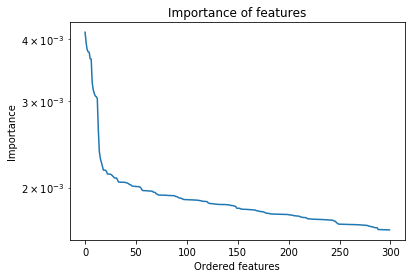

In [3]:
from data_generator import  train_test_split, generate_mapping, create_dataset
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train, X_tst, y_tst = train_test_split(test_size=0.7, subsample=1, persistance=False)
print("The shape of the problem is {}".format(X_train.shape))

forest = RandomForestClassifier(n_estimators=15)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_tst)

error =  100*np.sum( y_pred != y_tst ) / len(y_tst)

print('And the error is ONLY {0:.2f} %!'.format(error))
result = np.sort(forest.feature_importances_)
result = result[::-1]
plt.semilogy(result[:300])
plt.title('Importance of features')
plt.xlabel('Ordered features')
plt.ylabel('Importance')


As you can barely see from the plot, there are some important features... but the order of magnitude is the same.
That classification took into account only a very very small portion of the dataset, but it's not so relevant. 

This data are just *well done* for the point of view of classification.
They have large portions of significant information, there are no translations or rotations.

**This is way it's very very simple to classify them!**

There is no need of Deep Learning at all (for this dataset).